In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [28]:
raw_file=pd.read_csv("data.csv")

In [3]:
raw_file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq
0,FRB20180725A,-9999,644.2,0.00295,1.70,4.10,0.000296,760.1,485.3,607.4
1,FRB20180727A,-9999,620.9,0.00295,0.58,2.31,0.001390,800.2,400.2,493.3
2,FRB20180729A,-9999,78.8,0.00098,11.70,17.00,0.000100,692.7,400.2,525.6
3,FRB20180729B,-9999,223.2,0.00197,0.92,1.20,0.000314,800.2,441.8,657.5
4,FRB20180730A,-9999,789.7,0.00492,5.20,27.00,0.000468,759.2,400.2,483.5
...,...,...,...,...,...,...,...,...,...,...
595,FRB20190701A,-9999,582.8,0.00197,1.26,1.70,0.000608,800.2,400.2,800.2
596,FRB20190701B,-9999,687.6,0.00295,1.10,1.90,0.000630,732.8,400.2,471.5
597,FRB20190701C,-9999,915.8,0.00197,0.88,2.50,0.001440,495.5,402.2,446.4
598,FRB20190701D,-9999,877.4,0.00885,1.33,8.60,0.001400,651.8,400.2,467.6


In [4]:
raw_file.drop(raw_file[raw_file['flux']==0].index,inplace=True)

In [5]:
raw_file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq
0,FRB20180725A,-9999,644.2,0.00295,1.70,4.10,0.000296,760.1,485.3,607.4
1,FRB20180727A,-9999,620.9,0.00295,0.58,2.31,0.001390,800.2,400.2,493.3
2,FRB20180729A,-9999,78.8,0.00098,11.70,17.00,0.000100,692.7,400.2,525.6
3,FRB20180729B,-9999,223.2,0.00197,0.92,1.20,0.000314,800.2,441.8,657.5
4,FRB20180730A,-9999,789.7,0.00492,5.20,27.00,0.000468,759.2,400.2,483.5
...,...,...,...,...,...,...,...,...,...,...
595,FRB20190701A,-9999,582.8,0.00197,1.26,1.70,0.000608,800.2,400.2,800.2
596,FRB20190701B,-9999,687.6,0.00295,1.10,1.90,0.000630,732.8,400.2,471.5
597,FRB20190701C,-9999,915.8,0.00197,0.88,2.50,0.001440,495.5,402.2,446.4
598,FRB20190701D,-9999,877.4,0.00885,1.33,8.60,0.001400,651.8,400.2,467.6


In [6]:
from scipy.integrate import quad

def D_igm(x):
  return 814.634639*(1+x)/(0.315*((1+x)**3)+ 0.685)**0.5
  
x=np.linspace(0.0022500000000,3.0000000000000,29976)
z=[]
for i in raw_file['dm_exc_ne2001'] :
  list=[]
  for j in range(29976):
     list.append(np.absolute(quad(D_igm, 0,x[j])[0]-i-30-(70/(1+x[j]))))
  z.append(x[list.index(min(list))])   


In [7]:
raw_file['redshift']=z

In [8]:
raw_file['mid_freq']=(raw_file['high_freq']+raw_file['low_freq'])/2

In [9]:
raw_file['L_dist']=(3*(10**8)*3.086*(10**22)/(70000*0.25))*(raw_file['redshift']*0.5-0.5*(((raw_file['redshift']+1)**0.5)-1))

In [10]:
raw_file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist
0,FRB20180725A,-9999,644.2,0.00295,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26
1,FRB20180727A,-9999,620.9,0.00295,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26
2,FRB20180729A,-9999,78.8,0.00098,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25
3,FRB20180729B,-9999,223.2,0.00197,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25
4,FRB20180730A,-9999,789.7,0.00492,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,FRB20190701A,-9999,582.8,0.00197,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26
596,FRB20190701B,-9999,687.6,0.00295,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26
597,FRB20190701C,-9999,915.8,0.00197,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26
598,FRB20190701D,-9999,877.4,0.00885,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26


In [11]:
raw_file['bright_temp']= (raw_file['flux']*(10**(-26))*(raw_file['L_dist'])**2)/(2*np.pi*1.380649*10**(-23)*((raw_file['width_fitb']*raw_file['mid_freq']*10**6)**2)*(1+raw_file['redshift']) )

In [12]:
raw_file['rest_pulse_width']=raw_file['width_fitb']/(1+raw_file['redshift'])
raw_file['rest_freq_bandwidth']=(raw_file['high_freq']-raw_file['low_freq'])*(1+raw_file['redshift'])

In [13]:
raw_file['burst_energy']=4*np.pi*(raw_file['L_dist']**2)*raw_file['fluence']*(10**(-29))*raw_file['peak_freq']/(1+raw_file['redshift'])

In [14]:
raw_file.to_csv("final_data.csv")

In [2]:
data=pd.read_csv("final_data.csv")

In [3]:
data

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy
0,FRB20180725A,-9999,644.2,0.00295,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,4.630920e+37,0.000165,492.500924,2.512414e+27
1,FRB20180727A,-9999,620.9,0.00295,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,7.297861e+35,0.000786,707.045531,1.087891e+27
2,FRB20180729A,-9999,78.8,0.00098,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,2.787780e+38,0.000084,350.024867,6.930280e+26
3,FRB20180729B,-9999,223.2,0.00197,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,5.119889e+36,0.000233,483.904159,1.819974e+26
4,FRB20180730A,-9999,789.7,0.00492,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,8.908483e+37,0.000240,699.019239,1.794453e+28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,-9999,582.8,0.00197,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,7.539154e+36,0.000352,690.964190,1.181603e+27
590,FRB20190701B,-9999,687.6,0.00295,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,8.818246e+36,0.000343,611.391878,9.971920e+26
591,FRB20190701C,-9999,915.8,0.00197,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,3.339418e+36,0.000691,194.366306,1.928647e+27
592,FRB20190701D,-9999,877.4,0.00885,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,3.638206e+36,0.000686,513.675789,6.502931e+27


In [4]:
data['bc_width']=data['bc_width']*1000
data["rest_pulse_width"]=data['rest_pulse_width']*1000
data['bright_temp']=np.log10(data['bright_temp'])
data['burst_energy']=np.log10(data['burst_energy'])
data['rest_freq_bandwidth']=np.log10(data['rest_freq_bandwidth'])


In [5]:
for i in range(len(data)):
    if data.iloc[i,1] != '-9999':
       data.iloc[i,0]= data.iloc[i,1]

In [7]:
for i in range(len(data)):
    if data.iloc[i,1] != '-9999':
       data.iloc[i,1]= 1
    else:
        data.iloc[i,1]=0   

In [52]:
data.to_csv("use_this_data.csv")

In [2]:
file_raw=pd.read_csv("use_this_data.csv")

In [95]:
file_raw_2= file_raw[['repeater_name','dm_exc_ne2001','bc_width','flux','fluence','peak_freq','bright_temp','rest_pulse_width','rest_freq_bandwidth','burst_energy']]

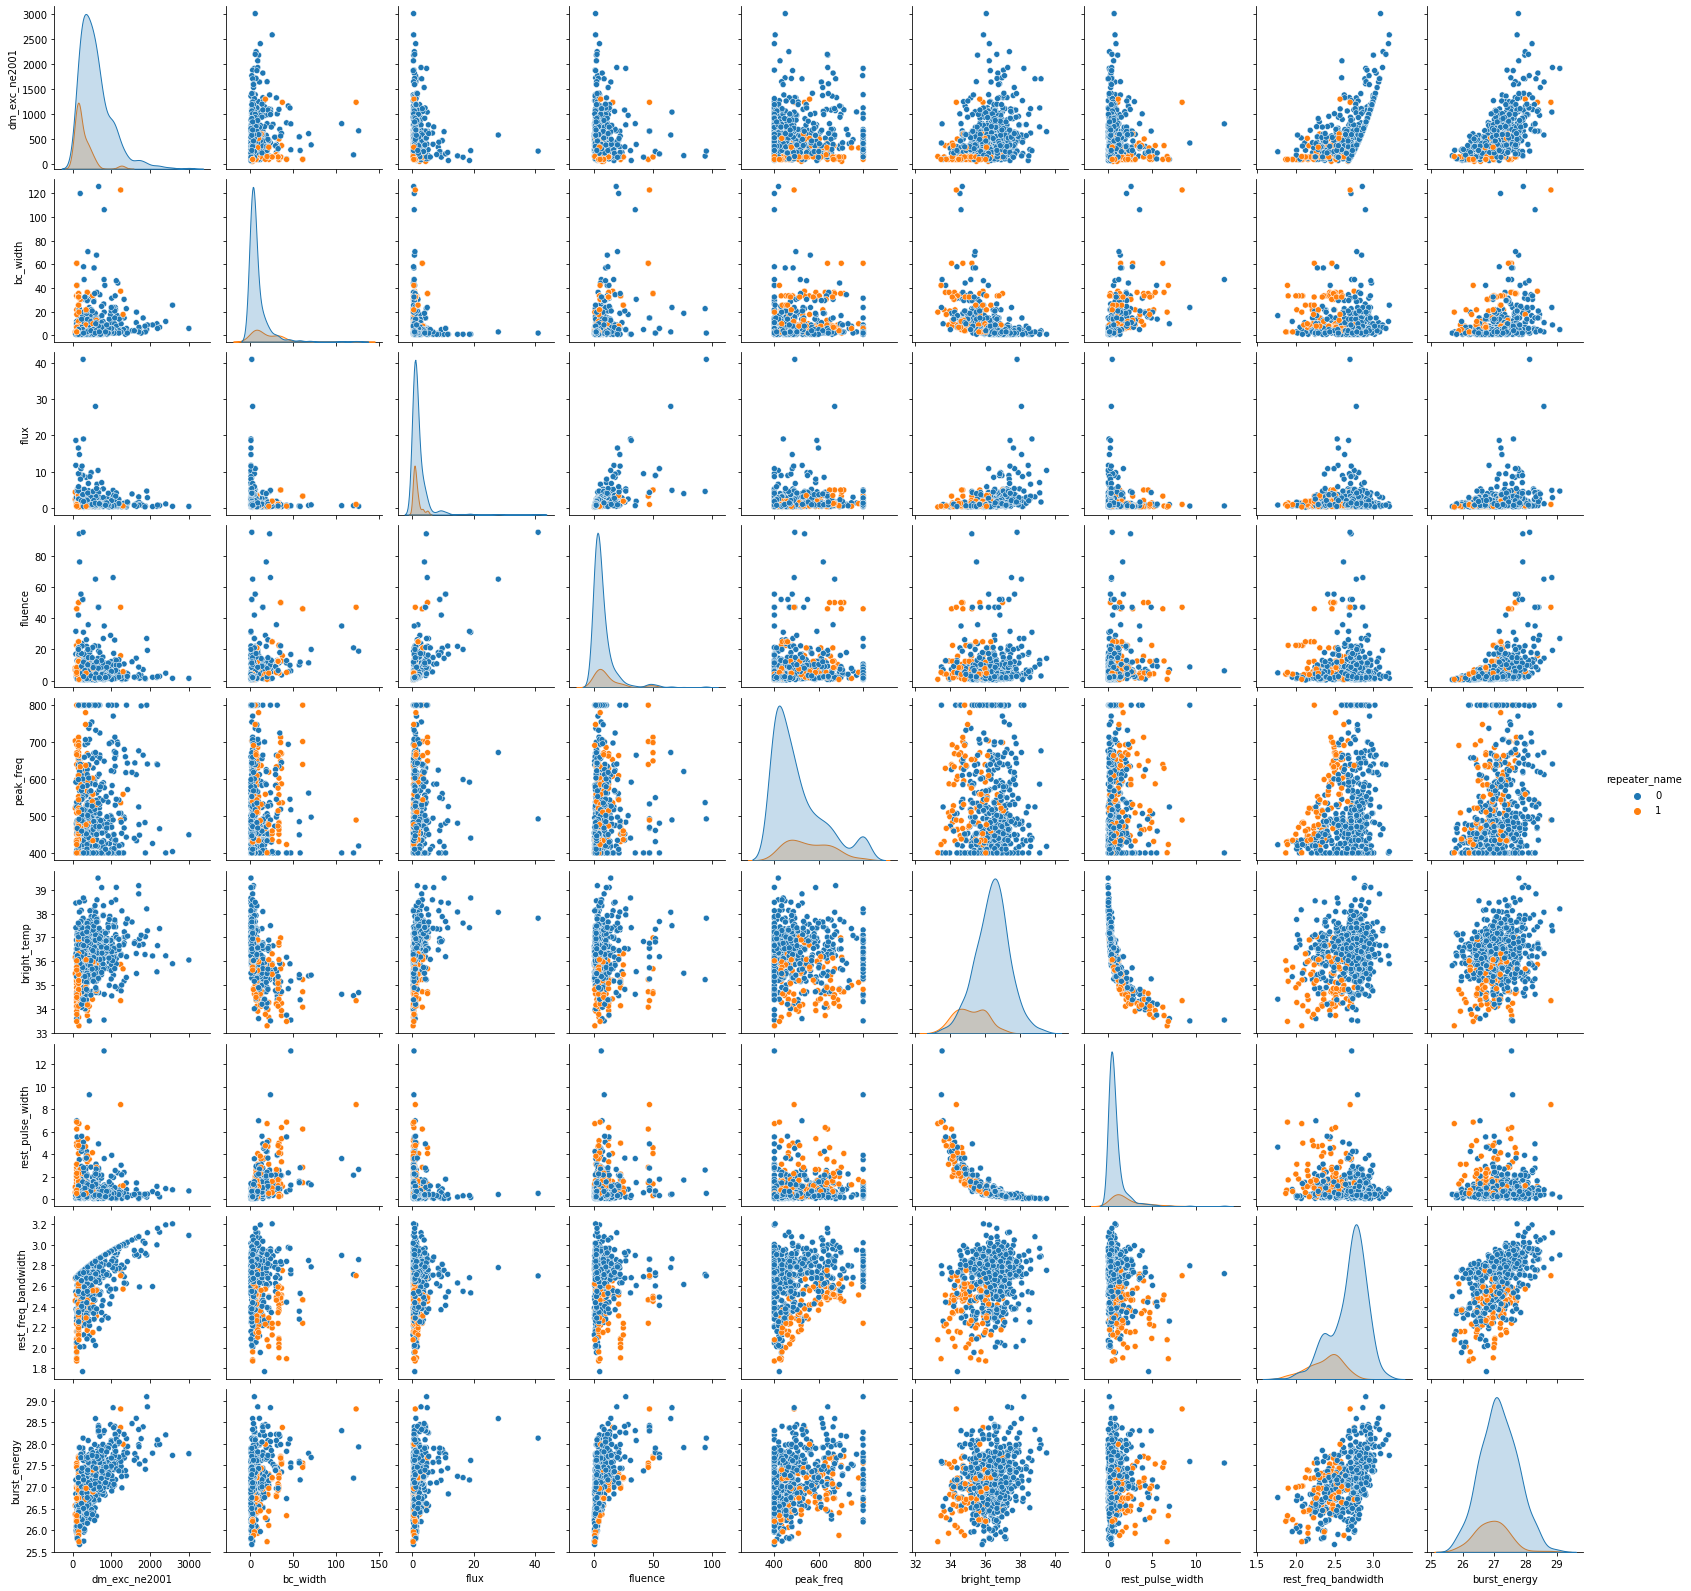

In [97]:
sns.pairplot(file_raw_2, hue="repeater_name")

X---------------------------------------------X

In [44]:
from sklearn.model_selection import train_test_split

In [42]:
file=pd.read_csv("use_this_data.csv")

In [45]:
file=pd.read_csv("use_this_data.csv")

x= file.drop(['repeater_name','tns_name','width_fitb','high_freq','low_freq','mid_freq','L_dist','redshift'],axis=1)
y=file['repeater_name']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
from sklearn.preprocessing import StandardScaler
X_train =StandardScaler().fit_transform(x_train)
Fit=StandardScaler().fit(x_train)
X_train=pd.DataFrame(X_train,columns=['dm_exc_ne2001','bc_width','flux','fluence','peak_freq','bright_temp','rest_pulse_width','rest_freq_bandwidth','burst_energy'])
X_test=Fit.transform(x_test)
X_test=pd.DataFrame(X_test,columns=['dm_exc_ne2001','bc_width','flux','fluence','peak_freq','bright_temp','rest_pulse_width','rest_freq_bandwidth','burst_energy'])

In [52]:
y_test

,repeater_name
428,0
403,0
589,0
141,0
80,0
...,...
462,0
76,1
593,0
382,0


In [56]:
x=Fit.transform(x)

In [57]:
x=pd.DataFrame(x,columns=['dm_exc_ne2001','bc_width','flux','fluence','peak_freq','bright_temp','rest_pulse_width','rest_freq_bandwidth','burst_energy'])

In [58]:
import imblearn
from imblearn.over_sampling import SMOTE

In [59]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 284 to 168
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   repeater_name  415 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [60]:
len(y_train[y_train['repeater_name']==1])

67

In [61]:
oversample=SMOTE()
x_resample,y_resample=oversample.fit_resample(X_train,y_train)

In [62]:
y_resample=y_resample.values.ravel()

x--------x

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [316]:
param_grid={
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2,4],
    'max_depth':[2,4,6,8,10]
}
CV_dt = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_dt.fit(x_resample, y_resample)
print(CV_dt.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
dt=DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_dt=dt.predict(X_test)
score_dt=fbeta_score(y_test,y_pred_dt,beta=2,average="binary")
score_dt

0.8394160583941606

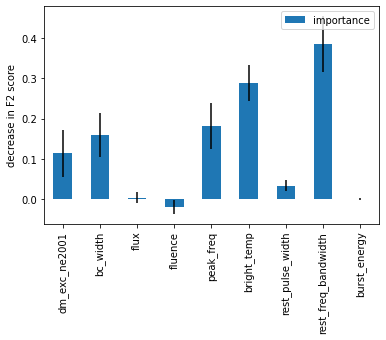

In [67]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(dt, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

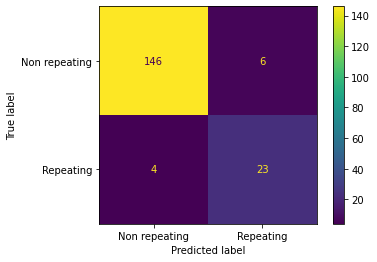

In [68]:
cm = confusion_matrix(y_test, y_pred_dt,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [ ]:
dt=DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_dt=dt.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_dt1,true_positive_rate_dt1,thresholds= roc_curve(y_test,y_pred_dt) 


x---------x

In [24]:
dt=DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_all=dt.predict(x)
file['pred_repeate_dt1']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109,0


x-----------------------------------------------x

In [320]:
param_grid={
    'max_depth':[1,2,4,6,8,10]
}
CV_dt_2 = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_dt_2.fit(x_resample[['rest_freq_bandwidth','bright_temp']], y_resample)
print(CV_dt_2.best_params_)

{'max_depth': 4}


In [321]:
dt_2=DecisionTreeClassifier(max_depth=4).fit(x_resample[['rest_freq_bandwidth','bright_temp']],y_resample)
y_pred_dt_2=dt_2.predict(X_test[['rest_freq_bandwidth','bright_temp']])
score_dt_2=fbeta_score(y_test,y_pred_dt_2,beta=2,average="binary")
score_dt_2

0.7894736842105262

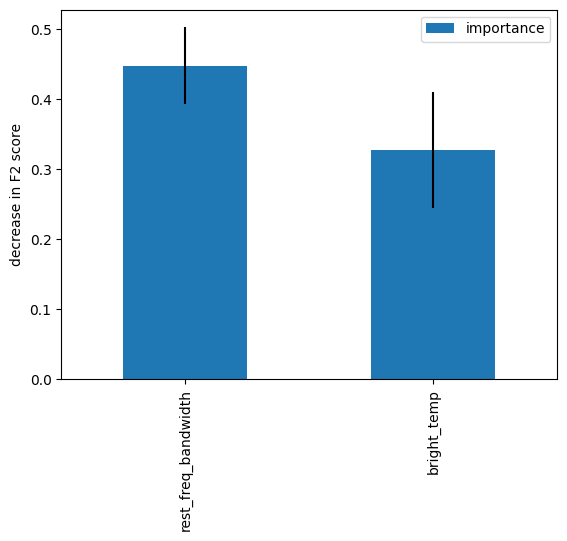

In [322]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(dt_2, X_test[['rest_freq_bandwidth','bright_temp']], y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test[['rest_freq_bandwidth','bright_temp']].columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

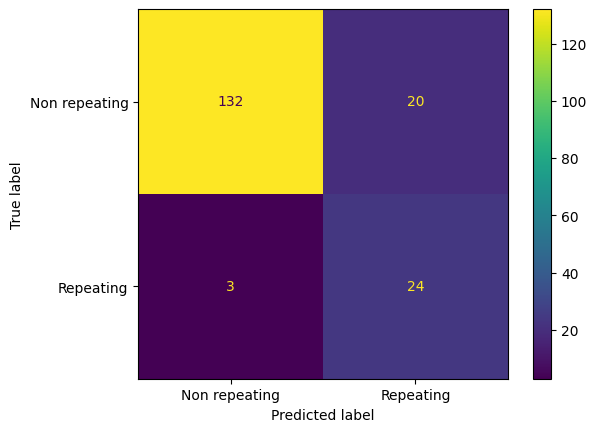

In [323]:
cm = confusion_matrix(y_test, y_pred_dt_2,labels=dt_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [86]:
dt=DecisionTreeClassifier(max_depth=4).fit(x_resample[['rest_freq_bandwidth','bright_temp']],y_resample)
y_pred_dt=dt.predict_proba(X_test[['rest_freq_bandwidth','bright_temp']])
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_dt2,true_positive_rate_dt2,thresholds= roc_curve(y_test,y_pred_dt) 

x------------x

In [29]:
dt_2=DecisionTreeClassifier(max_depth=4).fit(x_resample[['rest_freq_bandwidth','bright_temp']],y_resample)
y_pred_all=dt_2.predict(x[['rest_freq_bandwidth','bright_temp']])
file['pred_repeate_dt2']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109,0,0


# RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
param_grid={
    'n_estimators':[40,100],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2,4]
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_rfc.fit(x_resample, y_resample)
print(CV_rfc.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [334]:
rfc=RandomForestClassifier(n_estimators= 100, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_rfc=rfc.predict(X_test)
score_rfc=fbeta_score(y_test,y_pred_rfc,beta=2,average="binary")
score_rfc

0.8582089552238806

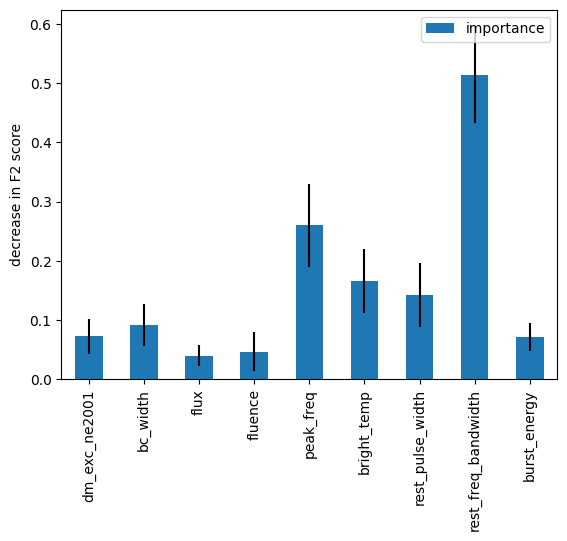

In [335]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(rfc, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

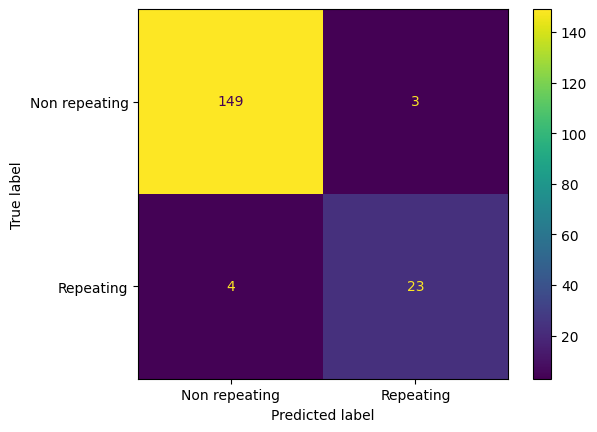

In [336]:
cm = confusion_matrix(y_test, y_pred_rfc,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [87]:
dt=RandomForestClassifier(n_estimators= 100, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_dt=dt.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_rfc,true_positive_rate_rfc,thresholds= roc_curve(y_test,y_pred_dt) 

x--------------x

In [31]:
rfc=RandomForestClassifier(n_estimators= 100, min_samples_leaf= 1, min_samples_split= 2).fit(x_resample,y_resample)
y_pred_all=dt.predict(x)
file['pred_repeate_rfc']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109,0,0,0


# AdaBoost 

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [346]:
param_grid={
    'n_estimators':[10,50,80],
    'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=6)]
}
CV_etc = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_etc.fit(x_resample, y_resample)
print(CV_etc.best_params_)

{'base_estimator': DecisionTreeClassifier(max_depth=6), 'n_estimators': 50}


In [351]:
ada=AdaBoostClassifier(n_estimators=50 ,base_estimator=(DecisionTreeClassifier(max_depth=6)) ).fit(x_resample,y_resample)
y_pred_ada=ada.predict(X_test)
score_ada=fbeta_score(y_test,y_pred_ada,beta=2,average="binary")
score_ada

0.8148148148148148

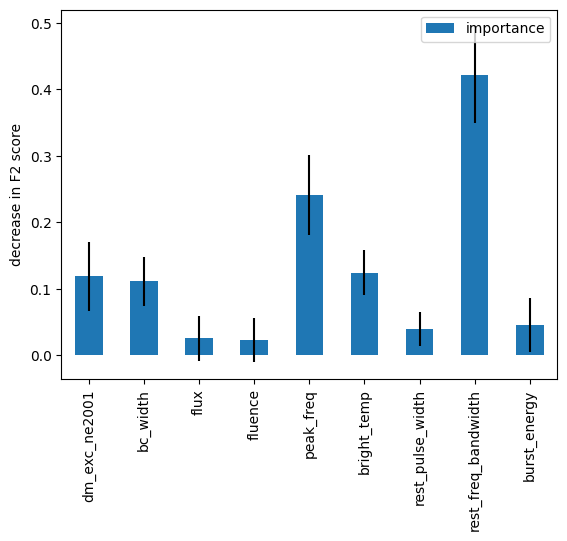

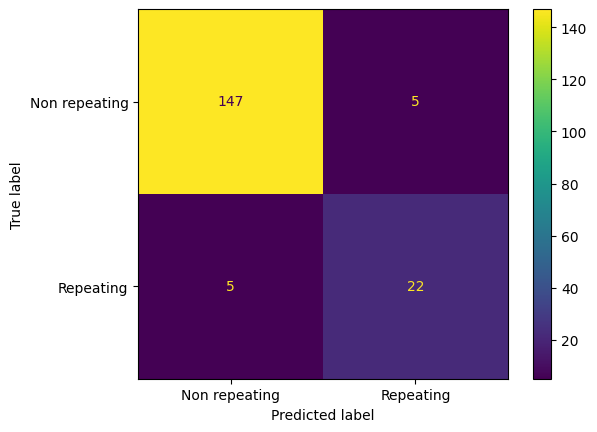

In [352]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(ada, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_ada,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [88]:
ada=AdaBoostClassifier(n_estimators=50 ,base_estimator=(DecisionTreeClassifier(max_depth=6)) ).fit(x_resample,y_resample)
y_pred_dt=ada.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_ada,true_positive_rate_ada,thresholds= roc_curve(y_test,y_pred_dt) 

x---------x

In [33]:
ada=AdaBoostClassifier(n_estimators=50 ,base_estimator=(DecisionTreeClassifier(max_depth=6)) ).fit(x_resample,y_resample)
y_pred_all=ada.predict(x)
file['pred_repeate_ada']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109,0,0,0,0


# LGBMClassifier

In [34]:
from lightgbm import LGBMClassifier

In [356]:
param_grid={
    'n_estimators':[50,100],
    'num_leaves':[10,30,50]
}
CV_gbm= GridSearchCV(estimator= LGBMClassifier(), param_grid=param_grid, cv=3,n_jobs=-1)
CV_gbm.fit(x_resample, y_resample)
print(CV_gbm.best_params_)

{'n_estimators': 100, 'num_leaves': 30}


In [357]:
gbm= LGBMClassifier(n_estimators=100 , num_leaves=30).fit(x_resample,y_resample)
y_pred_gbm=gbm.predict(X_test)
score_gbm=fbeta_score(y_test,y_pred_gbm,beta=2,average="binary")
score_gbm

0.7954545454545454

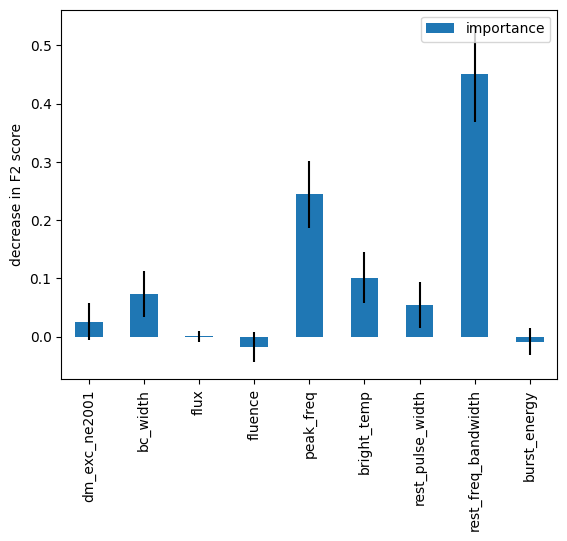

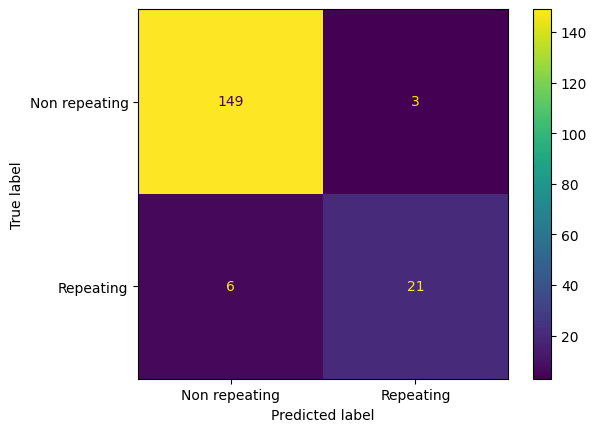

In [358]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(gbm, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_gbm,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [89]:
gbm= LGBMClassifier(n_estimators=100 , num_leaves=30).fit(x_resample,y_resample)
y_pred_dt=gbm.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_gbm,true_positive_rate_gbm,thresholds= roc_curve(y_test,y_pred_dt) 

x-----------------x

In [35]:
gbm= LGBMClassifier(n_estimators=100 , num_leaves=30).fit(x_resample,y_resample)
y_pred_all=gbm.predict(x)
file['pred_repeate_gbm']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,1.199517e+26,37.665667,0.165159,2.692407,27.400091,0,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,1.158830e+26,35.863196,0.786371,2.849447,27.036585,0,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,2.717721e+25,38.445258,0.083565,2.544099,26.840751,0,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,4.978343e+25,36.709261,0.232562,2.684759,26.260065,0,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,1.459413e+26,37.949804,0.240354,2.844489,28.253932,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,1.092710e+26,36.877323,0.351972,2.839456,27.072472,0,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,1.276044e+26,36.945382,0.342723,2.786320,26.998779,0,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,1.692618e+26,36.523671,0.691231,2.288621,27.285253,0,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,1.620886e+26,36.560887,0.685724,2.710689,27.813109,0,0,0,0,0


# XGBClassifier

In [37]:
import xgboost
from xgboost import XGBClassifier

In [362]:
param_grid={
    'n_estimators':[80,100,120],
    'max_depth':[4,6],
    'learning_rate':[0.1,0.3],
    'gamma':[0],
    'scale_pos_weight':[1,3.5],
    'reg_alpha':[0]
}

cv=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid,cv=3,n_jobs=-1)
cv.fit(x_resample,y_resample)
print(cv.best_params_)

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 80, 'reg_alpha': 0, 'scale_pos_weight': 1}


In [364]:
xgc=XGBClassifier(gamma= 0, learning_rate= 0.3, max_depth= 6, n_estimators= 80, reg_alpha= 0, scale_pos_weight= 1).fit(x_resample,y_resample)
y_pred_xgc=xgc.predict(X_test)
score_xgc=fbeta_score(y_test,y_pred_xgc,beta=2,average="binary")
score_xgc

0.8455882352941175

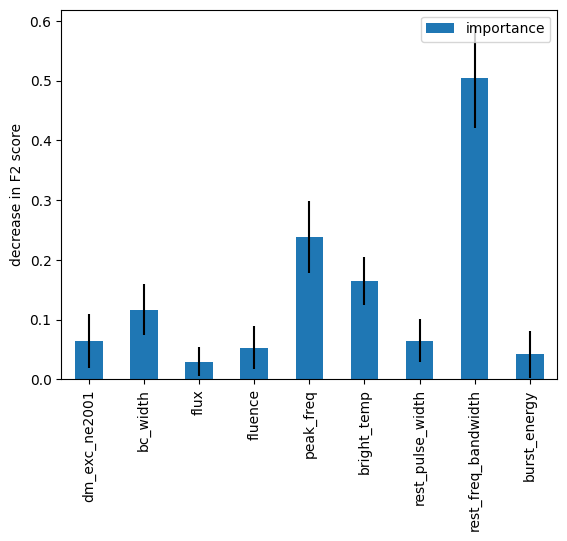

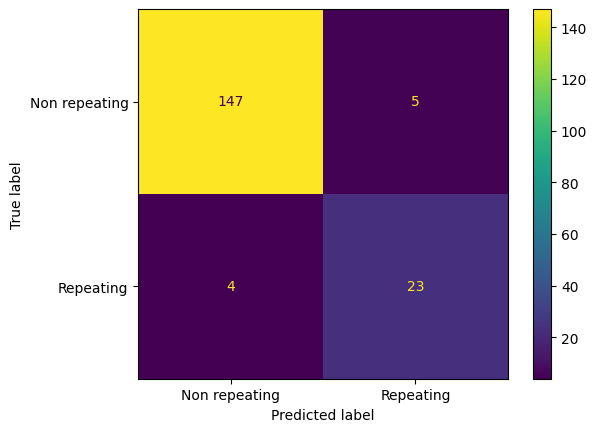

In [365]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(xgc, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_xgc,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [90]:
xgc=XGBClassifier(gamma= 0, learning_rate= 0.3, max_depth= 6, n_estimators= 80, reg_alpha= 0, scale_pos_weight= 1).fit(x_resample,y_resample)
y_pred_dt=xgc.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_xgc,true_positive_rate_xgc,thresholds= roc_curve(y_test,y_pred_dt) 

x-------------------x

In [38]:
xgc=XGBClassifier(gamma= 0, learning_rate= 0.3, max_depth= 6, n_estimators= 80, reg_alpha= 0, scale_pos_weight= 1).fit(x_resample,y_resample)
y_pred_all=xgc.predict(x)
file['pred_repeate_xgc']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,37.665667,0.165159,2.692407,27.400091,0,0,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,35.863196,0.786371,2.849447,27.036585,0,0,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,38.445258,0.083565,2.544099,26.840751,0,0,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,36.709261,0.232562,2.684759,26.260065,0,0,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,37.949804,0.240354,2.844489,28.253932,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,36.877323,0.351972,2.839456,27.072472,0,0,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,36.945382,0.342723,2.786320,26.998779,0,0,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,36.523671,0.691231,2.288621,27.285253,0,0,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,36.560887,0.685724,2.710689,27.813109,0,0,0,0,0,0


# Support vector machine

In [40]:
from sklearn.svm import SVC

In [371]:
param_distribution={
    'kernel':["linear","rbf"]
    
}
CV_etr = GridSearchCV(estimator=SVC(), param_grid=param_distribution, cv=3,n_jobs=-1)
CV_etr.fit(x_resample, y_resample)
print(CV_etr.best_params_)

{'kernel': 'rbf'}


In [372]:
svc=SVC(kernel="rbf").fit(x_resample,y_resample)
y_pred_svc=svc.predict(X_test)
score_svc=fbeta_score(y_test,y_pred_svc,beta=2,average="binary")
score_svc

0.821917808219178

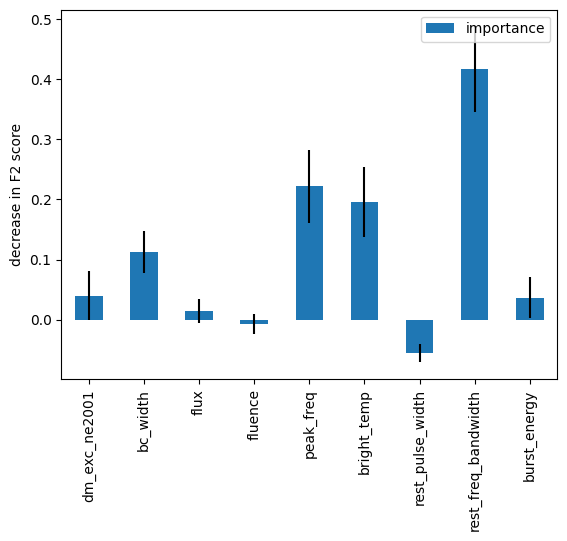

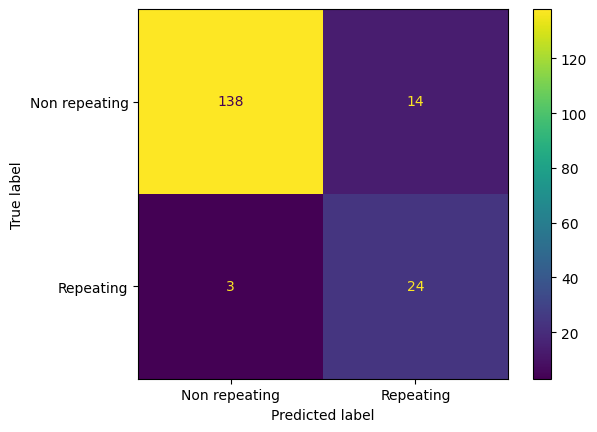

In [373]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(svc, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_svc,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()
plt.show()

In [92]:
svc=SVC(kernel="rbf",probability=True).fit(x_resample,y_resample)
y_pred_dt=svc.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_svc,true_positive_rate_svc,thresholds= roc_curve(y_test,y_pred_dt) 

x-----------x

In [41]:
svc=SVC(kernel="rbf").fit(x_resample,y_resample)
y_pred_all=svc.predict(x)
file['pred_repeate_svc']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,rest_pulse_width,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc,pred_repeate_svc
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,0.165159,2.692407,27.400091,0,0,0,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,0.786371,2.849447,27.036585,0,0,0,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,0.083565,2.544099,26.840751,0,0,0,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,0.232562,2.684759,26.260065,0,0,0,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,0.240354,2.844489,28.253932,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,0.351972,2.839456,27.072472,0,0,0,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,0.342723,2.786320,26.998779,0,0,0,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,0.691231,2.288621,27.285253,0,0,0,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,0.685724,2.710689,27.813109,0,0,0,0,0,0,0


# nearestCentroid

In [42]:
from sklearn.neighbors import NearestCentroid

In [375]:
nc=NearestCentroid().fit(x_resample,y_resample)
y_pred_nc=nc.predict(X_test)
score_nc=fbeta_score(y_test,y_pred_nc,beta=2,average="binary")
score_nc

0.5743243243243243

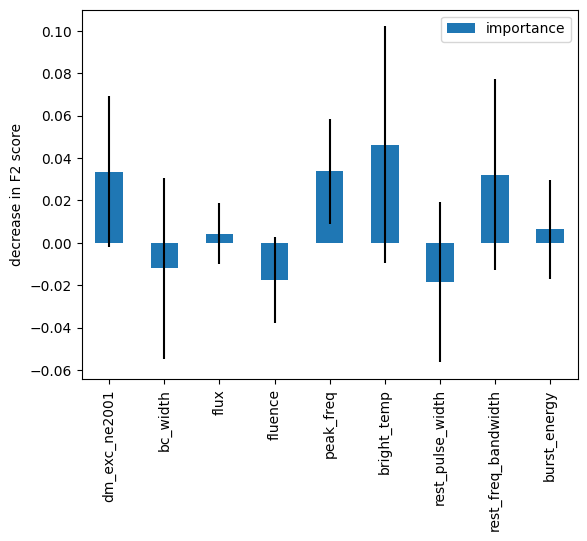

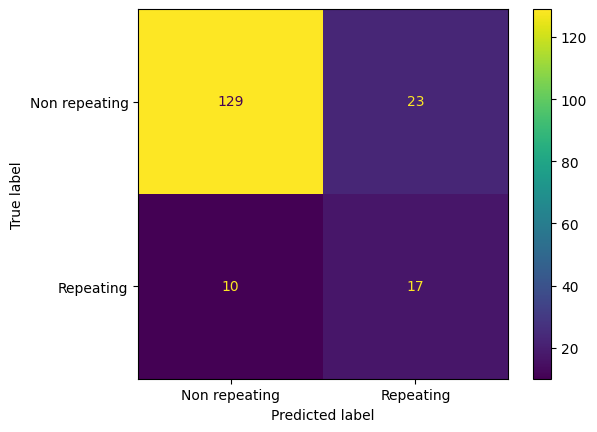

In [376]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(nc, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_nc,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()

In [97]:
nc=NearestCentroid().fit(x_resample,y_resample)
y_pred_dt=nc.predict(X_test)
false_positive_rate_nc,true_positive_rate_nc,thresholds= roc_curve(y_test,y_pred_dt) 

x------------x

In [43]:
nc=NearestCentroid().fit(x_resample,y_resample)
y_pred_all=nc.predict(x)
file['pred_repeate_nc']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,rest_freq_bandwidth,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc,pred_repeate_svc,pred_repeate_nc
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,2.692407,27.400091,0,0,0,0,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,2.849447,27.036585,0,0,0,0,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,2.544099,26.840751,0,0,0,0,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,2.684759,26.260065,0,0,0,0,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,2.844489,28.253932,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,2.839456,27.072472,0,0,0,0,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,2.786320,26.998779,0,0,0,0,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,2.288621,27.285253,0,0,0,0,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,2.710689,27.813109,0,0,0,0,0,0,0,0


# KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [378]:
param_distribution={
    'n_neighbors':[3,5,8,10],
    'weights' : ['uniform', 'distance']
    
}
CV_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_distribution, cv=3,n_jobs=-1)
CV_knn.fit(x_resample, y_resample)
print(CV_knn.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [379]:
knn=KNeighborsClassifier().fit(x_resample,y_resample)
y_pred_knn=knn.predict(X_test)
score_knn=fbeta_score(y_test,y_pred_knn,beta=2,average="binary")
score_knn

0.7432432432432431

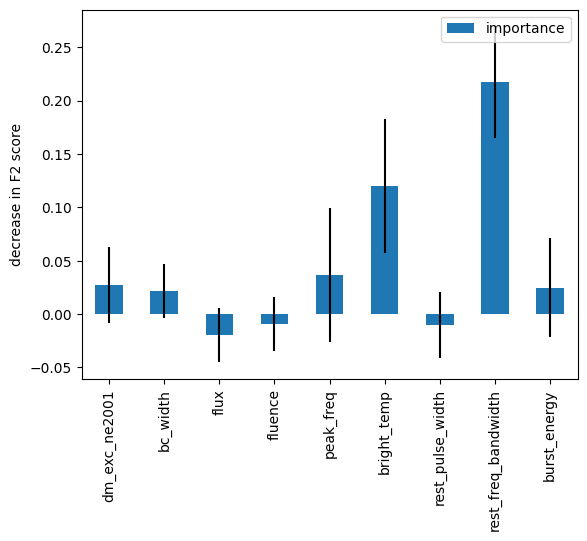

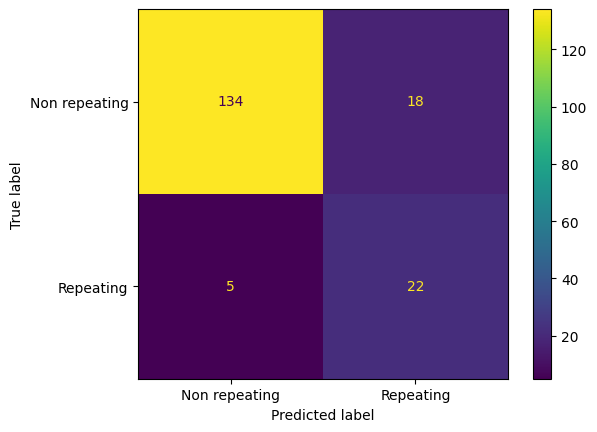

In [380]:
from sklearn.inspection import permutation_importance
def f2(model,x,y):
    y_pred=model.predict(x)
    return fbeta_score(y,y_pred,beta=2)

r = permutation_importance(knn, X_test, y_test,n_repeats=30,random_state=0, scoring=f2)



feature_importances = pd.DataFrame(r.importances_mean, index =X_test.columns,  columns=['importance'])
feature_importances.plot.bar(yerr=r.importances_std)    # plotting ranking based on their importance   
plt.ylabel("decrease in F2 score")
plt.show()

cm = confusion_matrix(y_test, y_pred_knn,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non repeating','Repeating'])
disp.plot()

In [98]:
knn=KNeighborsClassifier().fit(x_resample,y_resample)
y_pred_dt=knn.predict_proba(X_test)
y_pred_dt=pd.DataFrame(data=y_pred_dt)
y_pred_dt=y_pred_dt[1].values
false_positive_rate_knn,true_positive_rate_knn,thresholds= roc_curve(y_test,y_pred_dt) 

x---------x

In [45]:
knn=KNeighborsClassifier().fit(x_resample,y_resample)
y_pred_all=knn.predict(x)
file['pred_repeate_knn']=y_pred_all
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc,pred_repeate_svc,pred_repeate_nc,pred_repeate_knn
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,27.400091,0,0,0,0,0,0,0,0,0
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,27.036585,0,0,0,0,0,0,0,0,0
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,26.840751,0,0,0,0,0,0,0,0,0
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,26.260065,0,0,0,0,0,0,0,0,0
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,28.253932,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,27.072472,0,0,0,0,0,0,0,0,0
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,26.998779,0,0,0,0,0,0,0,0,0
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,27.285253,0,0,0,0,0,0,0,0,0
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,27.813109,0,0,0,0,0,0,0,0,0


In [51]:
file.to_csv("results_1_catalog.csv")

In [26]:
file=pd.read_csv('results_1_catalog.csv')

In [40]:
file[(file['pred_repeate_dt1']==1)&(file['pred_repeate_ada']==1)&(file['pred_repeate_xgc']==1)&(file['pred_repeate_svc']==1)&(file["repeater_name"]==0)]

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc,pred_repeate_svc,pred_repeate_nc,pred_repeate_knn
60,FRB20181017B,0,263.7,12.78,1.06,6.5,0.00231,704.8,499.3,593.2,...,27.041754,1,1,1,1,1,1,1,1,1


In [41]:
file[((file['pred_repeate_gbm']==1)&(file['repeater_name']==0)&(file['pred_repeate_knn']==1)&(file['pred_repeate_dt2']))|((file['pred_repeate_ada']==1)&(file['repeater_name']==0)&(file['pred_repeate_knn']==1))|((file['pred_repeate_svc']==1)&(file['repeater_name']==0)&(file['pred_repeate_knn']==1))|((file['pred_repeate_dt1']==1)&(file['repeater_name']==0)&(file['pred_repeate_knn']==1))|((file['pred_repeate_xgc']==1)&(file['repeater_name']==0)&(file['pred_repeate_knn']==1))]

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,burst_energy,pred_repeate_dt1,pred_repeate_dt2,pred_repeate_rfc,pred_repeate_ada,pred_repeate_gbm,pred_repeate_xgc,pred_repeate_svc,pred_repeate_nc,pred_repeate_knn
40,FRB20180920B,0,430.2,10.81,0.35,1.70,0.002330,483.4,400.2,421.1,...,26.601459,0,1,0,0,0,0,1,1,1
60,FRB20181017B,0,263.7,12.78,1.06,6.50,0.002310,704.8,499.3,593.2,...,27.041754,1,1,1,1,1,1,1,1,1
117,FRB20181125A,0,234.2,14.75,0.39,3.20,0.001580,520.9,400.2,426.5,...,26.524367,1,1,1,0,0,0,1,1,1
124,FRB20181128C,0,569.2,14.75,0.39,3.40,0.002300,572.1,403.2,480.3,...,27.136617,0,1,0,0,0,0,1,1,1
160,FRB20181221A,0,291.8,4.92,1.25,5.80,0.000754,583.3,446.1,510.1,...,26.984675,0,0,0,1,0,0,1,0,1
203,FRB20181231B,0,150.3,2.95,0.89,2.34,0.000337,800.0,540.6,657.7,...,26.347840,0,0,0,0,0,0,1,0,1
222,FRB20190109A,0,176.9,13.76,1.19,6.40,0.001650,800.2,400.2,583.0,...,26.812757,0,0,0,0,0,0,1,1,1
223,FRB20190109A,0,176.9,13.76,1.19,6.40,0.003400,800.2,400.2,523.6,...,26.766088,0,0,0,0,0,0,1,1,1
233,FRB20190113A,0,250.0,6.88,1.30,5.60,0.001820,800.2,491.9,800.2,...,27.077030,0,0,0,0,0,0,1,1,1
264,FRB20190125A,0,504.3,13.76,0.37,2.60,0.003210,800.2,510.1,655.5,...,27.077808,0,0,0,0,0,0,1,1,1


As we have to find potentially hidden repeating FRBs therefore we choose algorithms which have high FP/FN ratio

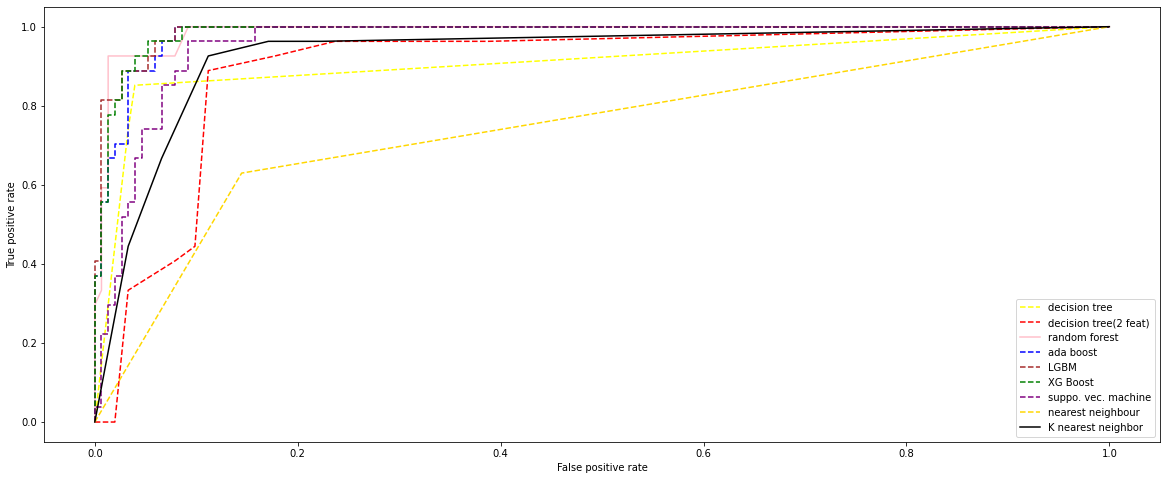

In [123]:
plt.figure(figsize=(20,8)) 
plt.plot(false_positive_rate_dt1,true_positive_rate_dt1,color="yellow",alpha=1,ls='dashed',label='decision tree')
plt.plot(false_positive_rate_dt2,true_positive_rate_dt2,color="red",alpha=1,ls='dashed',label='decision tree(2 feat)')
plt.plot(false_positive_rate_rfc,true_positive_rate_rfc,color="pink",alpha=1,label='random forest')
plt.plot(false_positive_rate_ada,true_positive_rate_ada,color="blue",alpha=1,ls='dashed',label='ada boost')
plt.plot(false_positive_rate_gbm,true_positive_rate_gbm,color="brown",alpha=1,ls='dashed',label='LGBM')
plt.plot(false_positive_rate_xgc,true_positive_rate_xgc,color="green",alpha=1,ls='dashed',label='XG Boost')
plt.plot(false_positive_rate_svc,true_positive_rate_svc,color="purple",alpha=1,ls='dashed',label='suppo. vec. machine')
plt.plot(false_positive_rate_nc,true_positive_rate_nc,color="gold",alpha=1,ls='dashed',label='nearest neighbour')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,color="black",alpha=1,label='K nearest neighbor')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [5]:
file_raw[file_raw['tns_name']=='FRB20121102A']

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy
103,FRB20121102A,1,375.9,36.37,0.46,12.6,0.0050,800.2,548.9,668.9,0.510492,674.55,7.445323e+25,34.233175,3.310179,2.579311,27.589590
104,FRB20121102A,1,375.9,36.37,0.46,12.6,0.0096,746.0,530.7,629.2,0.510492,638.35,7.445323e+25,33.714483,6.355543,2.512163,27.563018
105,FRB20121102A,1,375.9,36.37,0.46,12.6,0.0081,684.6,503.6,587.2,0.510492,594.10,7.445323e+25,33.924454,5.362490,2.436797,27.533015


In [6]:
file_raw[file_raw['tns_name']=='FRB20181017C']

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy


In [3]:
file_raw

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109
